In [38]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [39]:
input_size = 28*28         
hidden_size = 400          
out_size = 10              
epochs = 10                
batch_size = 100           
learning_rate = 0.003      

In [40]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [41]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [42]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon GPU)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using MPS (Apple Silicon GPU)


In [43]:

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size)                                 
        self.fc2 = nn.Linear(hidden_size, hidden_size)      
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()
        self.init_weights()
        
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):                          
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [44]:
net = Net(input_size, hidden_size, out_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [45]:
#Train the network
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):   
        images = images.view(-1, 28*28).to(device)    
        labels = labels.to(device)
            
        outputs = net(images)       
        _, predicted = torch.max(outputs.data, 1)                                              
        correct_train += (predicted == labels).sum() 
        loss = criterion(outputs, labels)                 
        running_loss += loss.item()
        
        optimizer.zero_grad() 
        loss.backward()                                   
        optimizer.step()                                  
    
    loss_values.append(running_loss/len(train_loader))
    accuracy_values.append(100*correct_train.float()/len(train_dataset))

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss_values[-1]:.3f}, Accuracy: {accuracy_values[-1]:.3f}%')

print("DONE TRAINING!")

Epoch [1/10], Loss: 0.197, Accuracy: 94.013%
Epoch [2/10], Loss: 0.087, Accuracy: 97.323%
Epoch [3/10], Loss: 0.063, Accuracy: 98.017%
Epoch [4/10], Loss: 0.050, Accuracy: 98.403%
Epoch [5/10], Loss: 0.046, Accuracy: 98.583%
Epoch [6/10], Loss: 0.038, Accuracy: 98.807%
Epoch [7/10], Loss: 0.031, Accuracy: 99.050%
Epoch [8/10], Loss: 0.035, Accuracy: 98.945%
Epoch [9/10], Loss: 0.027, Accuracy: 99.195%
Epoch [10/10], Loss: 0.027, Accuracy: 99.230%
DONE TRAINING!


Accuracy on 10000 test images: 98.07%


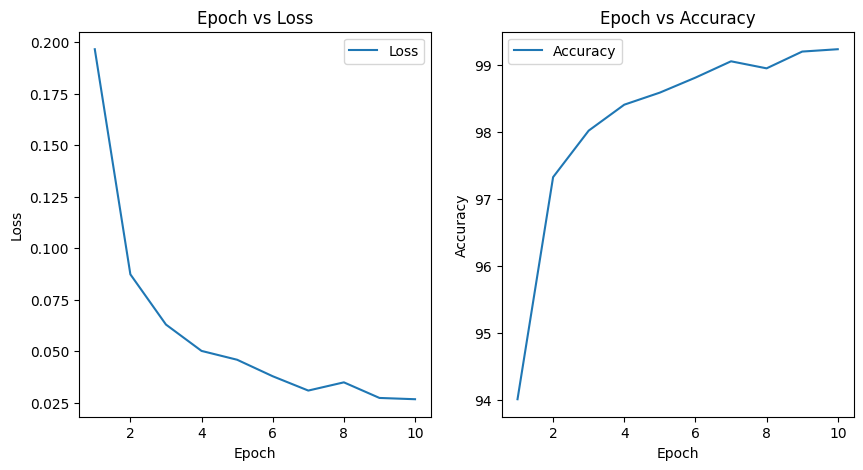

In [46]:
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / len(test_dataset)
    print(f'Accuracy on 10000 test images: {accuracy:.2f}%')

# Plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_values, label='Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

accuracy_values_numpy = [value.cpu().numpy() for value in accuracy_values]
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_values_numpy, label='Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

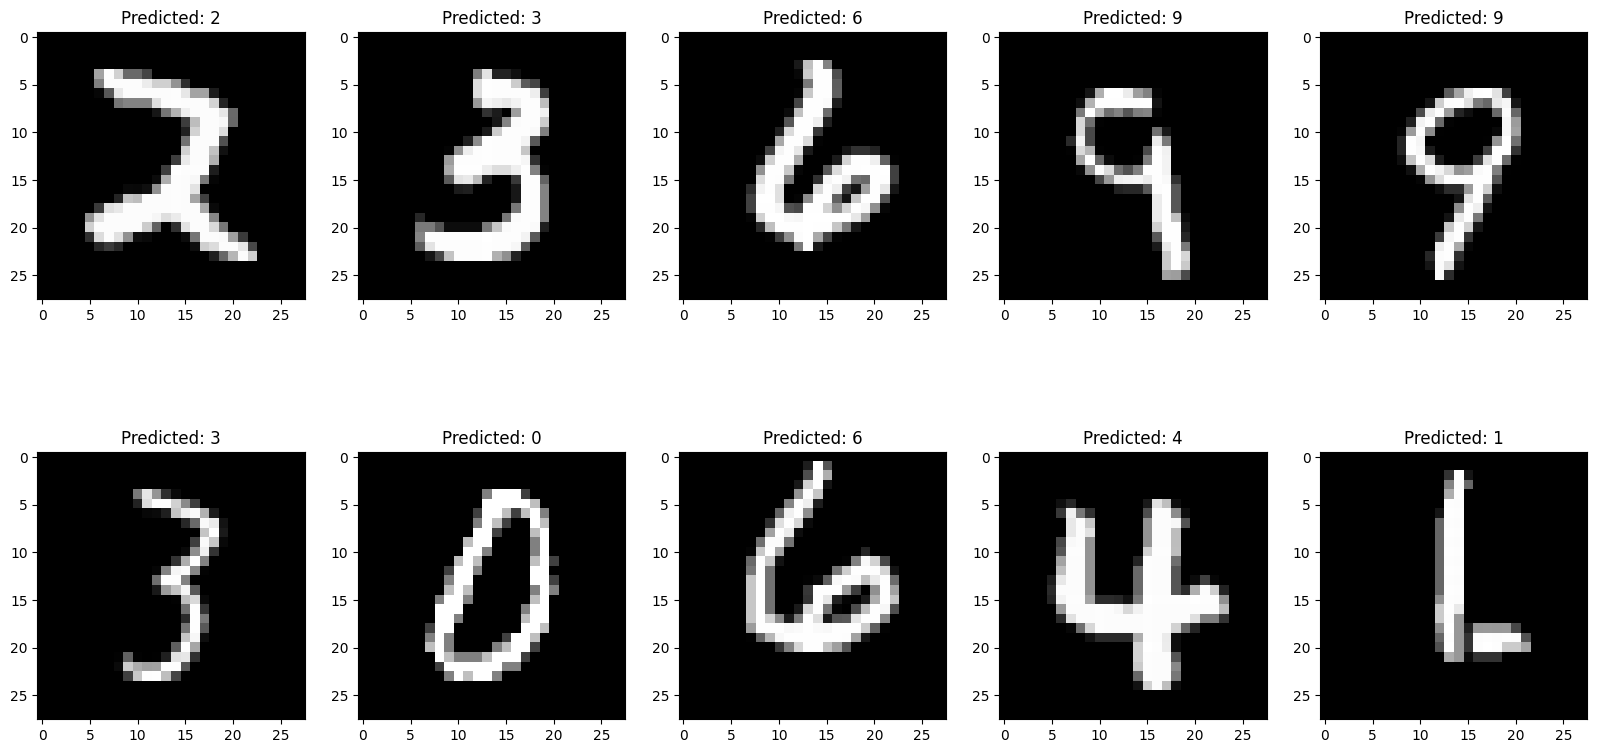

In [47]:
with torch.no_grad():
    plt.figure(figsize=(20, 10))
    for i in range(10):
        random_index = random.randint(0, len(test_dataset) - 1)
        image, label = test_dataset[random_index]
        output = net(image.view(-1, 28*28).to(device))
        _, predicted = torch.max(output.data, 1)
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.numpy().squeeze(), cmap='gray')
        plt.title(f'Predicted: {predicted.item()}')
    plt.show()